$$H_0: \boldsymbol{x} = \boldsymbol{w}\leftrightarrow H_1: \boldsymbol{x} = \boldsymbol{s} + \boldsymbol{w}$$
其中$\boldsymbol{x}\in\mathbb{C}^K$，$\boldsymbol{s}\sim \mathcal{CN}(0,\sigma_s^2\boldsymbol{I}_K)$，$\boldsymbol{w}\sim \mathcal{CN}(0,\sigma_n^2\boldsymbol{I}_K)$，信噪比为$\frac{\sigma_s^2}{\sigma_n^2}$。

不难证明$T(\boldsymbol{x})=\|\boldsymbol{x}\|^2$为上述问题的最优检测器，则$T$的概率密度函数为
\begin{equation}
\begin{aligned}
p_T(t) &= \left\{
    \begin{aligned}
    &p_{\chi^2_{2K}}(t)& \quad H_0\\\
    & p_{(\sigma_s^2+\sigma_n^2)\chi^2_{2K}}(t) & \quad H_1\\
    \end{aligned}
    \right.\\
    &= \left\{
    \begin{aligned}
    &p_{\chi^2_{2K}}(t) & \quad H_0\\\
    & \frac{1}{(\sigma_s^2+\sigma_n^2)} p_{\chi^2_{2K}}\left(\frac{t}{\sigma_s^2+\sigma_n^2}\right) & \quad H_1\\
    \end{aligned}
    \right.\\
\end{aligned}
\end{equation}



检测概率为
$$ P_{d} = 1-F_{\chi_{2K}^2}\left(\frac{\eta}{\sigma_s^2+\sigma_n^2}\right) = 1-F_{\chi_{2K}^2}\left(\frac{F^{-1}_{\chi_{2K}^2}(1-P_{fa})}{\sigma_s^2+\sigma_n^2}\right)$$
其中门限$\eta = F^{-1}_{\chi_{2K}^2}(1-P_{fa}) $

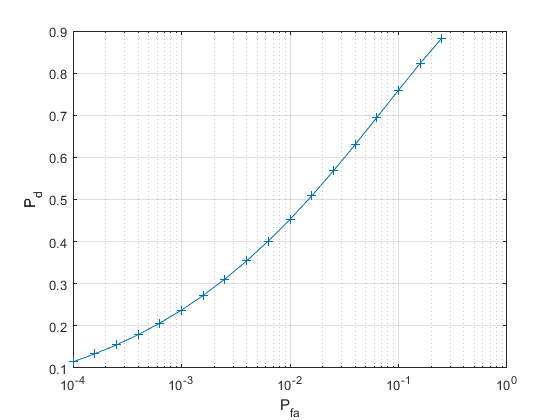

In [4]:
clear;clc;
sigma2_n = 1; % noise power
sigma2_s = 1; % sigal power
pfa = power(10,-4:0.2:-0.5);
K = 8; %num pulses
for i = 1:numel(pfa)
    thresh(i) = chi2inv(1-pfa(i),2*K);
    pd(i) = 1-chi2cdf(thresh(i)/(sigma2_s+sigma2_n), 2*K);
end %for
figure;
semilogx(pfa,pd,'+-');
grid on;
xlabel('P_{fa}');
ylabel('P_d');